# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

18/06/2018 01:09:11 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/uncut/Raw Data/083117/147/"
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/"

lightroot.SETTINGS["stack_files"] = pth+"Run0192_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0192_tp{}_MIP.tif"

# 2 Loading frames

In [3]:
# sample_time_frame =15
# stack = lightroot.io.get_stack(sample_time_frame)
# lightroot.io.plotimg(stack)

# 3 Full frame detection routine

In [4]:
# id_ = 380
# stack = lightroot.io.get_stack(id_)
# out = []
# blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=False,  overlay_original_id=id_,out=out) #sharpen_iter=2, isolate_iter=2,
# lightroot.io.overlay_blobs(stack,blob_centroids,out)

# 4 Running batch process

In [5]:
#lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

In [6]:
# stack = lightroot.io.get_stack(98)
# lightroot.io.plotimg(stack)

# 5 Low-level steps

## isolating roots via lowband

### 2d

18/06/2018 01:15:14 INFO(145):Stack loaded from C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/Run0192_tp145.tif
18/06/2018 01:15:20 INFO(145):estimated gaussian noise standard deviation = 0.04521211105829667
18/06/2018 01:15:20 INFO(145):using low band range for 2d data from 95,99, 50 data percentile [0.572, 0.621, 0.466]
18/06/2018 01:15:21 INFO(145):projecting 2d mask to 3d mask...
18/06/2018 01:16:00 INFO(145):did not find a clipped region adaptive threshold based on maximum label perimeters - returning image as is
18/06/2018 01:16:01 INFO(145):using low band range for 3d data from 95,99, 50 data percentile [0.264, 0.352, 0.16]
18/06/2018 01:16:01 INFO(145):using final filter from percentile low band range 0.352
18/06/2018 01:16:01 INFO(145):checking shine @ 778070.00
18/06/2018 01:16:01 WARN(145):because clipping was not terribly successfull, I will reduce the threshold value to the low value of 0.08
18/06/2018 01:16:04 INFO(145):switching adaptive threshold for final 

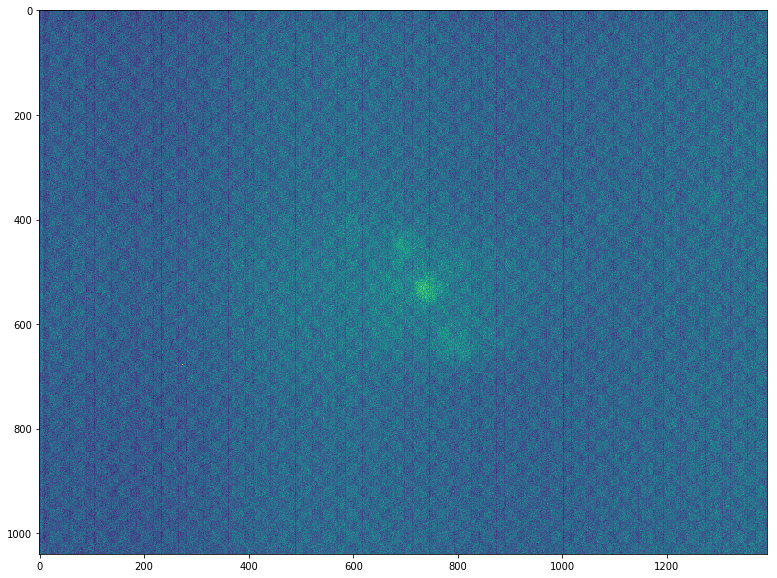

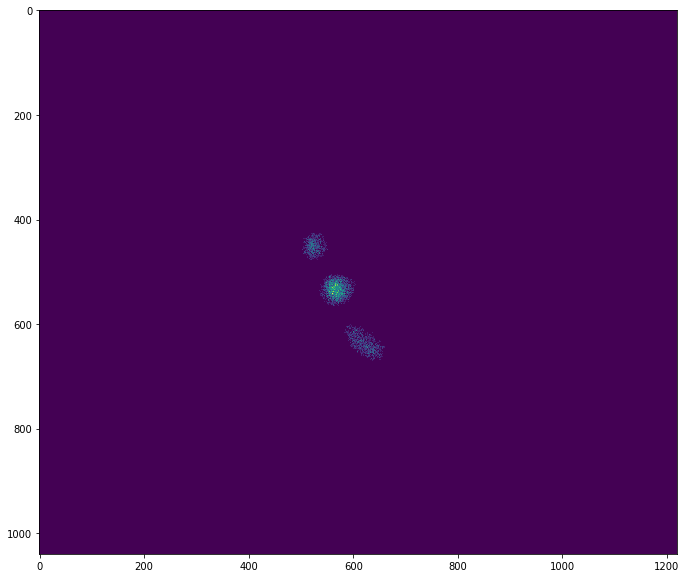

In [13]:
stack = lightroot.io.get_stack(145)

#im = stack.copy()
#stack = lightroot.blobs.denoise(stack)
#stack /= stack.max()
lightroot.io.plotimg(stack)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack,return_early=True,denoise_img=False)
lightroot.io.plotimg(stack)

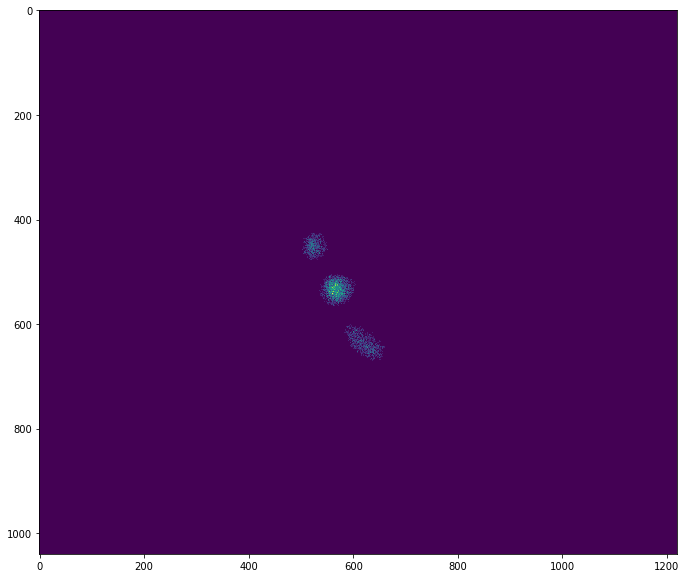

In [19]:
lightroot.io.plotimg(g2)

In [26]:
#new strategy - if the label is small and round, just return the label centroid, otherwise use a sub peak detector 
#if it is really small, mayb discard

from scipy.ndimage import maximum_filter,gaussian_filter,label
from skimage import  feature
im = g2.copy()
size = 10
min_distance = 5
image_max = maximum_filter(im, size=size, mode='constant')
coordinates = feature.peak_local_max(im, min_distance=min_distance)

In [27]:
coordinates

array([[ 17, 645, 603],
       [ 14, 659, 617],
       [ 13, 662, 629],
       [ 13, 652, 615],
       [ 12, 534, 545],
       [ 12, 516, 564],
       [ 12, 444, 504],
       [ 11, 644, 655],
       [ 11, 633, 651],
       [ 11, 561, 550],
       [ 11, 470, 530],
       [ 10, 668, 637],
       [ 10, 651, 652],
       [ 10, 622, 632],
       [ 10, 476, 519],
       [ 10, 436, 511],
       [  9, 661, 655],
       [  9, 653, 649],
       [  9, 653, 633],
       [  9, 652, 643],
       [  9, 645, 643],
       [  9, 642, 626],
       [  9, 641, 635],
       [  9, 638, 612],
       [  9, 636, 625],
       [  9, 622, 613],
       [  9, 612, 607],
       [  9, 557, 568],
       [  9, 459, 531],
       [  9, 456, 549],
       [  9, 454, 513],
       [  9, 446, 519],
       [  9, 437, 511],
       [  9, 436, 518],
       [  8, 645, 608],
       [  8, 644, 645],
       [  8, 638, 606],
       [  8, 630, 591],
       [  8, 625, 623],
       [  8, 508, 549],
       [  8, 462, 531],
       [  8, 449

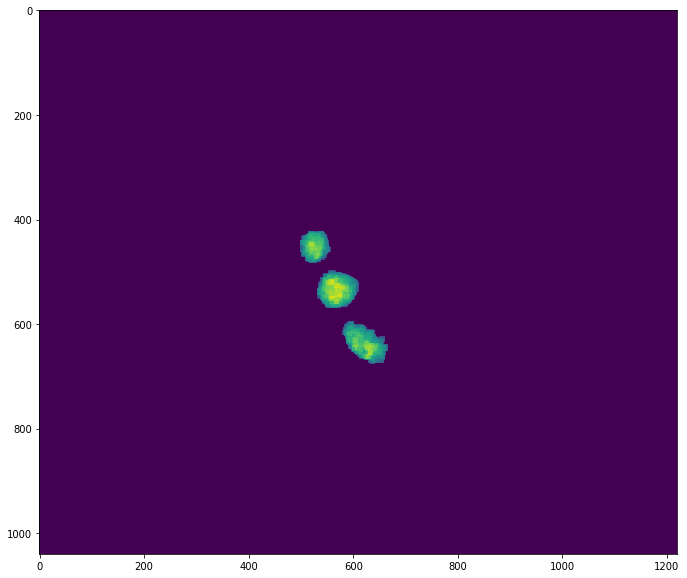

In [28]:
lightroot.io.plotimg(image_max)

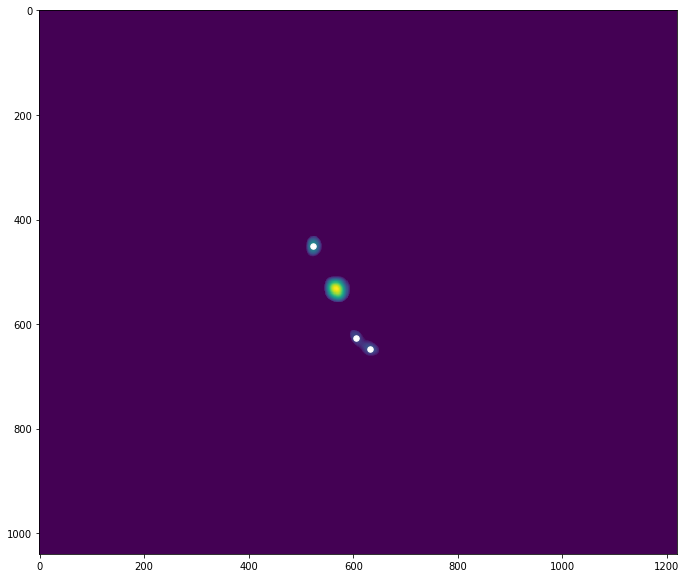

In [8]:
g2 = stack.copy()
g2, blobs = lightroot.blobs.simple_detector(g2)
lightroot.io.overlay_blobs(g2,blobs)

In [9]:
blobs

,z,y,x
0,10,647,633
1,8,450,524
2,7,626,606


In [ ]:
import numpy as np
ar = np.zeros((4,4),np.int)
ar[1,2] = 1
ar[1,3] = 1
ar[0,1] = 1
ar[2,0] = 1
ar[3,2] = 1
ar

In [ ]:
D = (ar.sum(1) * np.eye(4)).astype(int)
D

In [ ]:
D - ar

### 3d

In [ ]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

In [ ]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

## isolating blobs in data

In [ ]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

In [ ]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
# display results
import pandas as pd
im = stack.copy()


def peak_centroids(im, size=10, min_distance=10):
    image_max = ndi.maximum_filter(im, size=size, mode='constant')
    coordinates = peak_local_max(im, min_distance=min_distance)
    return pd.DataFrame(coordinates,columns=["z", "y", "x"])

blob_centroids = peak_centroids(im)
lightroot.io.overlay_blobs(stack,blobs_centroids)

## marking centroids

In [ ]:

blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)

In [ ]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm